# Data Transformation Notebook

This notebook demonstrates data transformation techniques to scale features for better comparability and analysis. The two methods covered are:
1. **Standardization**
2. **Normalization**

Both methods adjust the data values without distorting differences in ranges or proportions.


In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Loading the Dataset

We will use a small dataset with features having different scales to illustrate the need for standardization and normalization.


In [2]:
# Sample dataset with varying scales
data = {
    "ID": [1, 2, 3, 4, 5],
    "Height_cm": [150, 160, 165, 155, 170],  # Heights in cm
    "Weight_kg": [60, 65, 70, 55, 80],       # Weights in kg
    "Income_usd": [2000, 2200, 2500, 2100, 2700]  # Monthly income in USD
}

df = pd.DataFrame(data)

# Display dataset
df

,ID,Height_cm,Weight_kg,Income_usd
0,1,150,60,2000
1,2,160,65,2200
2,3,165,70,2500
3,4,155,55,2100
4,5,170,80,2700


## Why Standardization?

Standardization rescales the data so that it has a mean of 0 and a standard deviation of 1. It is useful for algorithms sensitive to feature scales or when outliers might distort results.

Formula:
\[
Z = (x-mean)/std
\]

Where:
- \( x \): Original value
- mean: Mean of the feature
- std: Standard deviation of the feature


In [3]:
# Standardization
scaler_standard = StandardScaler()
standardized_data = scaler_standard.fit_transform(df[['Height_cm', 'Weight_kg', 'Income_usd']])

# Create a new DataFrame
df_standardized = pd.DataFrame(standardized_data, columns=['Height_cm_std', 'Weight_kg_std', 'Income_usd_std'])

# Concatenate standardized data with original ID
df_standardized = pd.concat([df[['ID']], df_standardized], axis=1)

# Display results
df_standardized

,ID,Height_cm_std,Weight_kg_std,Income_usd_std
0,1,-1.414214,-0.697486,-1.150447
1,2,0.000000,-0.116248,-0.383482
2,3,0.707107,0.464991,0.766965
3,4,-0.707107,-1.278724,-0.766965
4,5,1.414214,1.627467,1.533930


## Visualizing Standardized Data

After standardization, all features have been rescaled to have a mean of 0 and a standard deviation of 1.


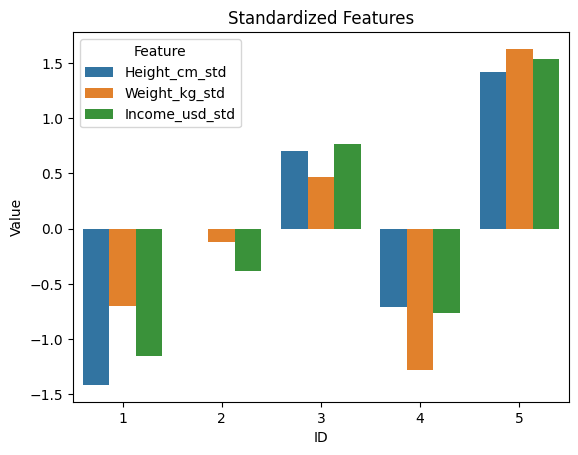

In [4]:
# Visualization of standardized data
df_standardized_melted = pd.melt(df_standardized, id_vars="ID", var_name="Feature", value_name="Value")
sns.barplot(data=df_standardized_melted, x="ID", y="Value", hue="Feature")
plt.title("Standardized Features")
plt.show()

## Why Normalization?

Normalization rescales data to a fixed range, typically [0, 1]. This is useful when:
- Data needs to fit within a fixed scale (e.g., pixel intensity in images).
- Outlier influence needs to be minimized.

Formula:
- 
x' = [x - min(x)]/[max(x) - min(x)]

Where:
- \( x \): Original value
- \( min(x) \): Minimum value in the feature
- \( max(x) \): Maximum value in the feature


In [5]:
# Normalization
scaler_normal = MinMaxScaler()
normalized_data = scaler_normal.fit_transform(df[['Height_cm', 'Weight_kg', 'Income_usd']])

# Create a new DataFrame
df_normalized = pd.DataFrame(normalized_data, columns=['Height_cm_norm', 'Weight_kg_norm', 'Income_usd_norm'])

# Concatenate normalized data with original ID
df_normalized = pd.concat([df[['ID']], df_normalized], axis=1)

# Display results
df_normalized

,ID,Height_cm_norm,Weight_kg_norm,Income_usd_norm
0,1,0.00,0.2,0.000000
1,2,0.50,0.4,0.285714
2,3,0.75,0.6,0.714286
3,4,0.25,0.0,0.142857
4,5,1.00,1.0,1.000000


## Visualizing Normalized Data

After normalization, all features have been rescaled to lie between 0 and 1.

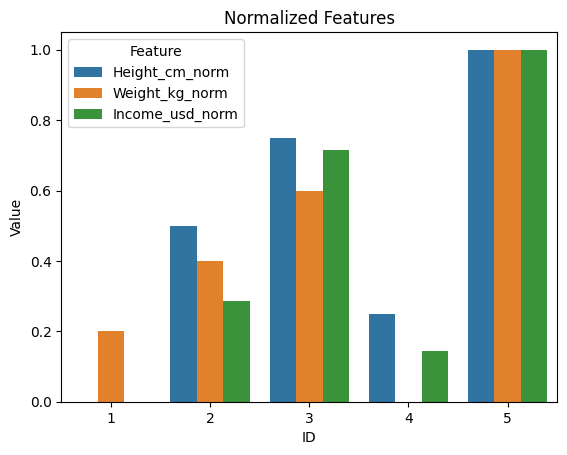

In [6]:
# Visualization of normalized data
df_normalized_melted = pd.melt(df_normalized, id_vars="ID", var_name="Feature", value_name="Value")
sns.barplot(data=df_normalized_melted, x="ID", y="Value", hue="Feature")
plt.title("Normalized Features")
plt.show()

## Comparing Standardization and Normalization

| Feature     | Original Scale       | Standardized Scale     | Normalized Scale |
|-------------|----------------------|------------------------|------------------|
| **Height**  | 150-170 cm           | Mean = 0, SD = 1       | 0 to 1           |
| **Weight**  | 55-80 kg             | Mean = 0, SD = 1       | 0 to 1           |
| **Income**  | 2000-2700 USD        | Mean = 0, SD = 1       | 0 to 1           |

- **Standardization**: Suitable for algorithms like PCA or SVM that are sensitive to feature scaling.
- **Normalization**: Useful when scaling to a specific range is required.


## Summary

1. **Standardization**: Adjusts the data to have a mean of 0 and a standard deviation of 1.
   - Effective for distance-based models and sensitive algorithms.
2. **Normalization**: Scales data between 0 and 1.
   - Useful for bounding features and reducing the effect of large values.

Both techniques improve data comparability and ensure fair representation in models.
